In [1]:
# Frequency domain filtering


maximum grayscale value 255
minimum grayscale value 0


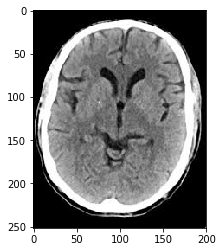

rows= 252 cols= 200


In [16]:
#import library imageio and read the file Head.jpeg 
# Downloaded from https://www.radiologymasterclass.co.uk/gallery/
#   ct_brain/ct_brain_stacks/ventricles_ct_brain
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im=imageio.imread('../Images/Head.jpeg')
print('maximum grayscale value',np.max(im))
print('minimum grayscale value', np.min(im))
plt.imshow(im,cmap='gray')
plt.show()

im = rgb2gray(im)

rows,cols=np.shape(im)
print('rows=',rows,'cols=',cols)

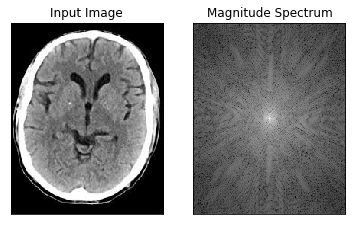

In [17]:
f = np.fft.fft2(im)
fshift = np.fft.fftshift(f)
#magnitude_spectrum = 20*np.abs(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Meshgrid and creation of frequency domain mask

Use meshgrid to create a rectangular grid from x and y arrays

Create a grid where we have a point at each integer value between:
- [0 and 5] in x
- [0 and 3] in y

To create grid, we need every combination of the x and y points.

In [50]:
M=4 #number of rows 
N=2 #number of cols 

u = np.arange(0, N , 1) #  = x
v = np.arange(0, M , 1) #  = y

U, V = np.meshgrid ( u, v) #U=x, V=y

print("u=",u)
print("v=",v)
print("U=",U)
print("V=",V)

for i in u:
    for j in v:
        print(f"(x,y) = {i},{j}")
        print(f"coords are x={U[j,i]},y={V[j,i]}")
        
        
plt.plot(U, V, marker='.', color='k', linestyle='none')

u= [0 1]
v= [0 1 2 3]
U= [[0 1]
 [0 1]
 [0 1]
 [0 1]]
V= [[0 0]
 [1 1]
 [2 2]
 [3 3]]
0,0
coords are x=0,y=0
0,1
coords are x=0,y=1
0,2
coords are x=0,y=2
0,3
coords are x=0,y=3
1,0
coords are x=1,y=0
1,1
coords are x=1,y=1
1,2
coords are x=1,y=2
1,3
coords are x=1,y=3


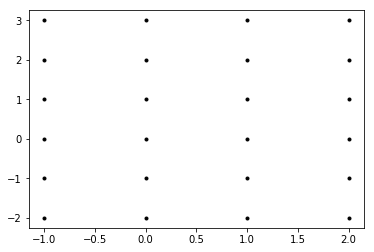

## Use meshgrid to create a circle

u= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
v= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


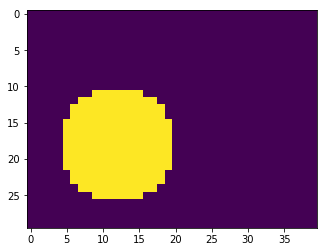

In [108]:
M=40 #number of rows 
N=30 #number of cols 

u = np.arange(0, M, 1) #  = x
v = np.arange(0, N , 1) #  = y

U, V = np.meshgrid ( u, v) #U=x, V=y

print("u=",u)
print("v=",v)

radius = 8
#circle centre x=12, y=18
mask = (U - 12 )**2 + (V -18 )**2 < radius**2

plt.imshow(mask)
plt.show()

## Use meshgrid to make the frequency domain mask
We create a function to calculate the mask, pass in the centre of circle and radius that we require.

We have to reconfigure the meshgrid, since the positive quadrant is in top left of mask, negative quadrant in bottom right.

### Method 1:  use "where" to find array indices > M/2, and adjust the values to be negatives.

In [109]:
import numpy as np

def create_uv1(MN):
    u = np.arange(0, MN, 1) #  = x
    idx = np.where(u > MN/2)
    u[idx] = u[idx] - MN
    return(u)

for M in range(4,9):
    u = create_uv(M)
    print(f"M={M}, u = {u}")



M=4, u = [ 0  1  2 -1]
M=5, u = [ 0  1  2 -2 -1]
M=6, u = [ 0  1  2  3 -2 -1]
M=7, u = [ 0  1  2  3 -3 -2 -1]
M=8, u = [ 0  1  2  3  4 -3 -2 -1]


### Split the range into two parts and change the order.  

e.g. 
   [-2,-1,0,1,2,3] 
-> [-2,-1], [0,1,2,3] 
-> [0,1,2,3], [-2,-1]
-> [0,1,2,3,-2,-1]

In [110]:
def create_uv2(MN):
    lower = np.arange(np.int(np.floor(-MN/2))+1, 0)
    upper = np.arange(0,np.int(np.floor(MN/2))+1)
    return( np.concatenate((upper,lower) ))

for M in range(4,9):
    u = create_uv2(M)
    print(f"M={M}, u = {u}")

M=4
N=6



M=4, u = [ 0  1  2 -1]
M=5, u = [ 0  1  2 -2 -1]
M=6, u = [ 0  1  2  3 -2 -1]
M=7, u = [ 0  1  2  3 -3 -2 -1]
M=8, u = [ 0  1  2  3  4 -3 -2 -1]


In [111]:
M = 4
N = 6

u = create_uv2(M)
v = create_uv2(N)

U, V  = np.meshgrid ( u, v )

print("u=",u)
print("v=",v)
print("U=",U)
print("V=",V)

u= [ 0  1  2 -1]
v= [ 0  1  2  3 -2 -1]
U= [[ 0  1  2 -1]
 [ 0  1  2 -1]
 [ 0  1  2 -1]
 [ 0  1  2 -1]
 [ 0  1  2 -1]
 [ 0  1  2 -1]]
V= [[ 0  0  0  0]
 [ 1  1  1  1]
 [ 2  2  2  2]
 [ 3  3  3  3]
 [-2 -2 -2 -2]
 [-1 -1 -1 -1]]


### Create circle in new coordinate system

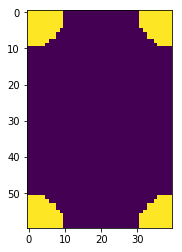

In [112]:
M = 40
N = 60

u = create_uv2(M)
v = create_uv2(N)

U, V  = np.meshgrid ( u, v )

xcentre = 0
ycentre = 0
mask = (U - xcentre )**2 + (V - ycentre )**2 < 100;

plt.imshow(mask)
plt.show()

In [198]:
# function FFTfilt by John Sims 2019.

# Input image, It, is in freq. domain (image transformed by FFT)
#     Also pass in centre and radius of required Ideal low pass filter and mesh grid coords.
#
#  Create mask (Ideal Low pass filter)
#
#  Apply mask to freq domain (multiply)
#  
#  Transform to spatial domain (ifft)

#  Return filtered image in spatial domain, j.


def fftFilt ( centre ,U ,V , It , radius):
    # Ideal low pass filter in frequency domain
    # centre = centre of LPF
    # radius = radius of LPF
    # U,V = coord system (meshgrid)
    
    mask = (U - centre [0] )**2 + (V - centre [1] )**2 < radius**2

   
    J = It * mask ;
    
    #take real part, since the array can contain small imaginary values due to numerical precision
    j = np.real( np.fft.ifft2( J ) ) 
    
    plt.figure(figsize=(15,4))
    
    plt.subplot(121),plt.imshow(mask,cmap='gray')
    plt.title(f'Mask (Ideal Low Pass Filter) radius={radius} position ({centre[0]}, {centre[1]})'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(j, cmap = 'gray')
    plt.title(f"Filtered Image"), plt.xticks([]), plt.yticks([])
    plt.show()
    return j



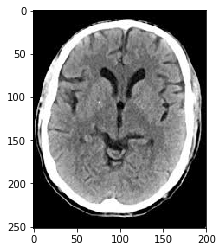

[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [-3 -3 -3 ... -3 -3 -3]
 [-2 -2 -2 ... -2 -2 -2]
 [-1 -1 -1 ... -1 -1 -1]]


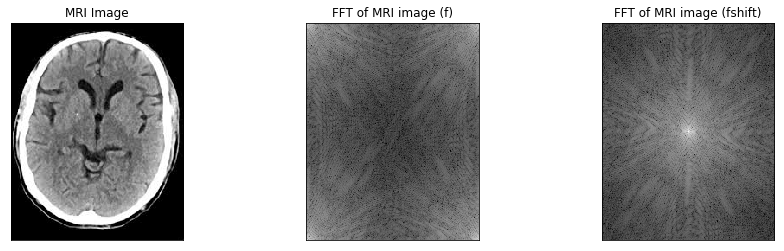

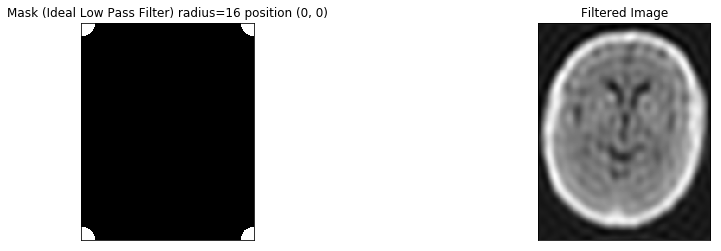

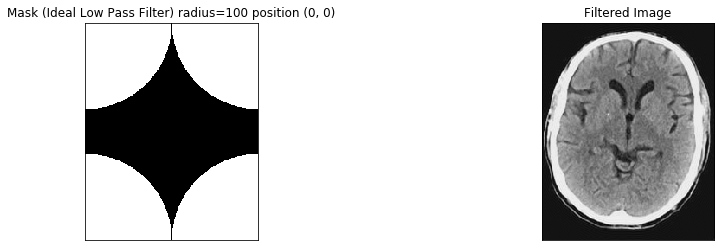

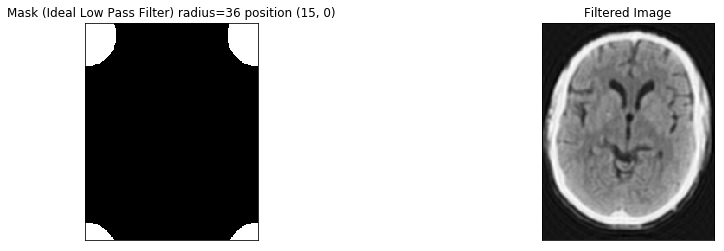

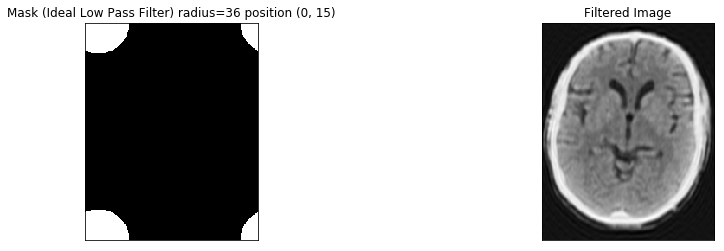

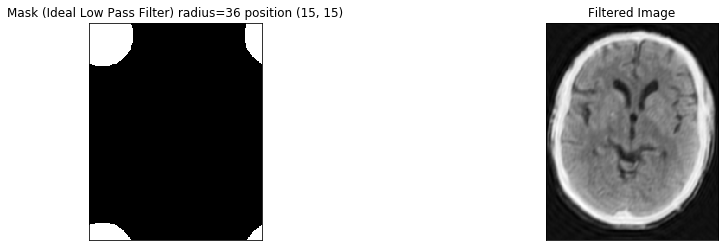

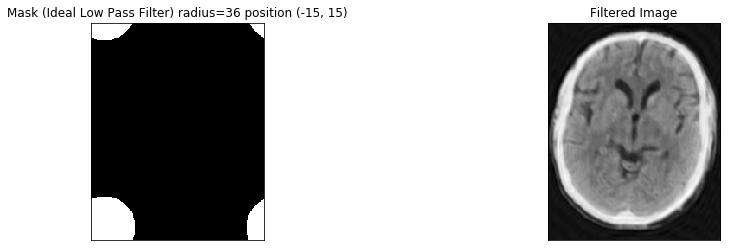

In [199]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im=imageio.imread('../Images/Head.jpeg')

im = rgb2gray(im)
plt.imshow(im,cmap='gray')
plt.show()
M,N=np.shape(im)

u = create_uv2(N)
v = create_uv2(M)

U, V  = np.meshgrid ( u, v)
print(V)


f = np.fft.fft2(im)
magnitude_spectrum_f = 20*np.log(np.abs(f))

fshift = np.fft.fftshift(f)
magnitude_spectrum_fshift = 20*np.log(np.abs(fshift))laplacian

#pyplot setting to make space between subplots large, and maintain size of figure.
#plt.subplots_adjust(wspace=0.3)
plt.figure(figsize=(15,4))

plt.subplot(131),plt.imshow(im, cmap = 'gray')
plt.title('MRI Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum_f, cmap = 'gray')
plt.title('FFT of MRI image (f)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum_fshift, cmap = 'gray')
plt.title('FFT of MRI image (fshift)'), plt.xticks([]), plt.yticks([])
plt.show()

centre = [0 ,0]
radius = 16
j1 = fftFilt (centre ,V ,U , f, radius )


centre = [0 ,0]
radius = 100
j1 = fftFilt (centre ,V ,U , f, radius )

centre = [15 ,0]
radius = 36
j1 = fftFilt (centre ,V ,U , f, radius )

centre = [0, 15]
radius = 36
j1 = fftFilt (centre ,V ,U , f, radius )

centre = [15, 15]
radius = 36
j1 = fftFilt (centre ,V ,U , f, radius )

centre = [-15, 15]
radius = 36
j1 = fftFilt (centre ,V ,U , f, radius )


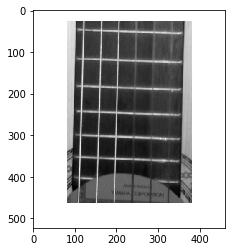

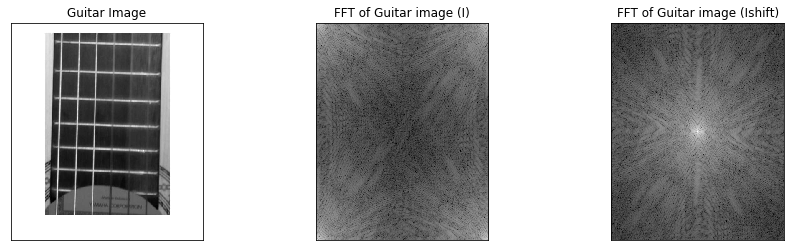

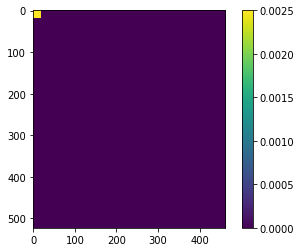

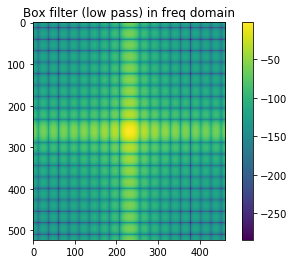

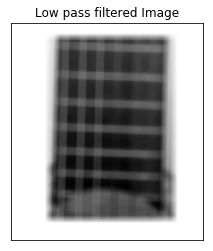

In [200]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im=imageio.imread('../Images/guitar.jpg')

im = rgb2gray(im)
plt.imshow(im,cmap='gray')
plt.show()

I = np.fft.fft2(im)
magnitude_spectrum_I = 20*np.log(np.abs(f))

Ishift = np.fft.fftshift(I)
magnitude_spectrum_Ishift = 20*np.log(np.abs(Ishift))

#pyplot setting to make space between subplots large, and maintain size of figure.
#plt.subplots_adjust(wspace=0.3)
plt.figure(figsize=(15,4))

plt.subplot(131),plt.imshow(im, cmap = 'gray')
plt.title('Guitar Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(magnitude_spectrum_f, cmap = 'gray')
plt.title('FFT of Guitar image (I)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum_fshift, cmap = 'gray')
plt.title('FFT of Guitar image (Ishift)'), plt.xticks([]), plt.yticks([])
plt.show()

row,col = np.shape(im)
h = np.zeros([row,col])
h[0:19,0:19]=1/400
plt.imshow(h)
plt.colorbar()
plt.show()

#Transform h to freq domain

H = np.fft.fft2(h)
Hshift = np.fft.fftshift(H)
magnitude_spectrum_Hshift = 20*np.log(np.abs(Hshift))

plt.imshow(magnitude_spectrum_Hshift)
plt.colorbar()
plt.title('Box filter (low pass) in freq domain')
plt.show()

G = I * H
g =  np.real( np.fft.ifft2( G ) ) 
    
plt.imshow(g, cmap = 'gray')
plt.title(f"Low pass filtered Image"), plt.xticks([]), plt.yticks([])
plt.show()


## Apply low pass ideal filter to head image

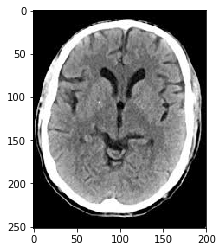

[[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [-3 -3 -3 ... -3 -3 -3]
 [-2 -2 -2 ... -2 -2 -2]
 [-1 -1 -1 ... -1 -1 -1]]


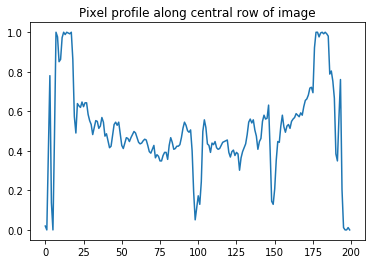

<Figure size 1080x288 with 0 Axes>

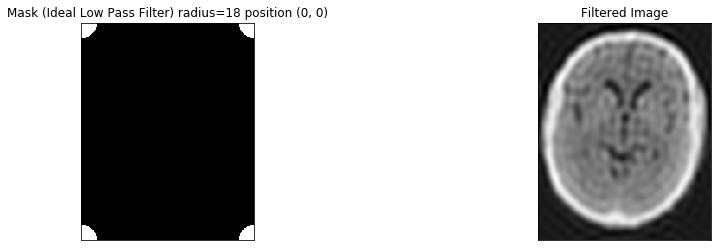

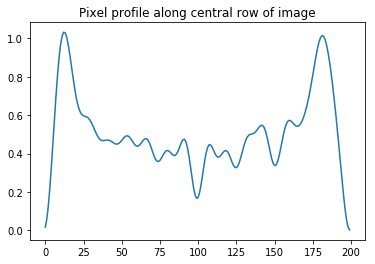

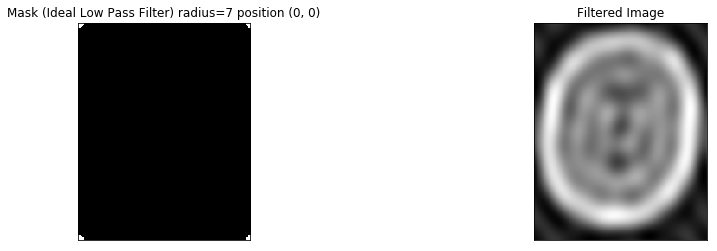

Text(0.5, 1.0, 'Pixel profile along central row of image')

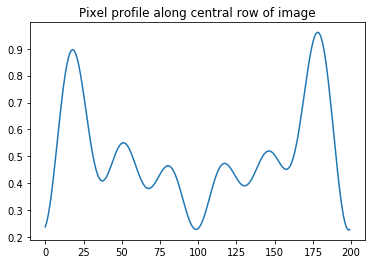

In [203]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im=imageio.imread('../Images/Head.jpeg')
laplacian
im = rgb2gray(im)
plt.imshow(im,cmap='gray')
plt.show()

row,col=np.shape(im)

Line = im[np.int(row/2),]
plt.plot(Line)
plt.title('Pixel profile along central row of image')


I = np.fft.fft2(im)
magnitude_spectrum_I = 20*np.log(np.abs(I))

Ishift = np.fft.fftshift(I)
magnitude_spectrum_Ishift = 20*np.log(np.abs(Ishift))

#pyplot setting to make space between subplots large, and maintain size of figure.
#plt.subplots_adjust(wspace=0.3)
plt.figure(figsize=(15,4))


u = create_uv2(col)
v = create_uv2(row)

U, V  = np.meshgrid ( u, v)
print(V)
centre = [0 ,0]
radius = 18
j1 = fftFilt (centre ,V ,U , I, radius )
Line = j1[np.int(row/2),]
plt.plot(Line)
plt.title('Pixel profile along central row of image')

radius = 7
j1 = fftFilt (centre ,V ,U , I, radius )
Line = j1[np.int(row/2),]
plt.plot(Line)
plt.title('Pixel profile along central row of image')

## Apply low pass ideal filter to head image


### Write new function for Ideal high pass filter


In [236]:


def fftHFilt ( centre ,U ,V , It , radius):laplacian
    # Ideal high pass filter in frequency domain
    # centre = centre of HPF
    # radius = radius of HPF
    # U,V = coord system (meshgrid)
    
    # Only difference is  Change < radius**2 for > radius**2
    mask = (U - centre [0] )**2 + (V - centre [1] )**2 > radius**2

   
    J = It * mask
    
    #take real part, since the array can contain small imaginary values due to numerical precision
    j = np.real( np.fft.ifft2( J ) ) 
    
    plt.figure(figsize=(15,4))
    
    plt.subplot(121),plt.imshow(mask,cmap='gray')
    plt.title(f'Mask (Ideal Low Pass Filter) radius={radius} position ({centre[0]}, {centre[1]})'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(j, cmap = 'gray')
    plt.title(f"Filtered Image"), plt.xticks([]), plt.yticks([])
    plt.show()
    return j



### Run function with coins image. Note "ringing" artifact close to edges of coins in profile line.

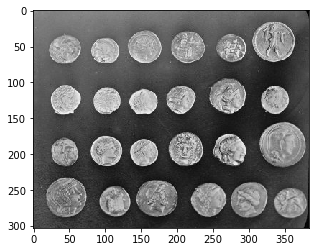

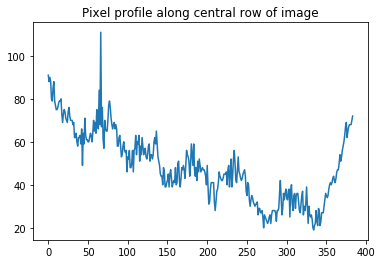

<Figure size 1080x288 with 0 Axes>

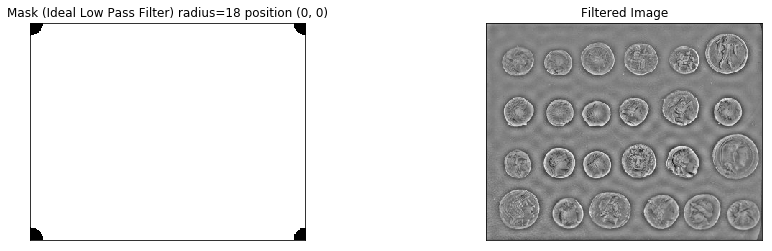

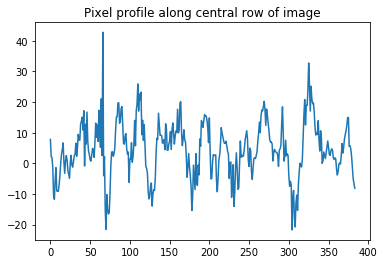

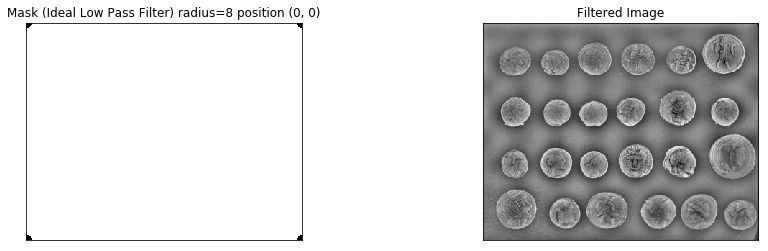

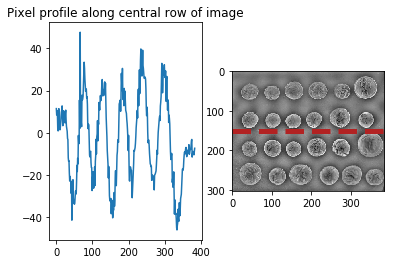

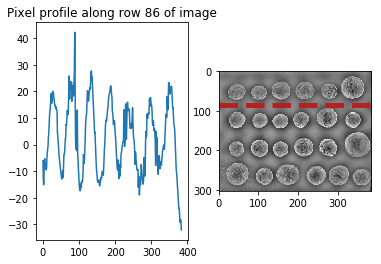

In [243]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

from skimage import data
im=data.coins()

#im=imageio.imread('../Images/Head.jpeg')

im = rgb2gray(im)
plt.imshow(im,cmap='gray')
plt.show()

row,col=np.shape(im)

Line = im[np.int(row/2),]
plt.plot(Line)
plt.title('Pixel profile along central row of image')


I = np.fft.fft2(im)
magnitude_spectrum_I = 20*np.log(np.abs(I))

Ishift = np.fft.fftshift(I)
magnitude_spectrum_Ishift = 20*np.log(np.abs(Ishift))

#pyplot setting to make space between subplots large, and maintain size of figure.
#plt.subplots_adjust(wspace=0.3)
plt.figure(figsize=(15,4))


u = create_uv2(col)
v = create_uv2(row)

U, V  = np.meshgrid ( u, v)

centre = [0 ,0]
radius = 18
j1 = fftHFilt (centre ,V ,U , I, radius )
Line = j1[np.int(row/2),]
plt.plot(Line)
plt.title('Pixel profile along central row of image')


    
radius = 8
j1 = fftHFilt (centre ,V ,U , I, radius )
Line = j1[np.int(row/2),]
plt.subplot(121),plt.plot(Line)
plt.title('Pixel profile along central row of image')
plt.subplot(122),plt.imshow(j1,cmap='gray')
a=np.empty(col)
a.fill(np.int(row/2))
plt.plot( range(col),a, '--', linewidth=5, color='firebrick')
plt.show()

ProfileRow = np.int(row/3.5)
Line = j1[ProfileRow,]
plt.subplot(121),plt.plot(Line)
plt.title(f'Pixel profile along row {ProfileRow} of image')
plt.subplot(122),plt.imshow(j1,cmap='gray')
a.fill(ProfileRow)
plt.plot( range(col),a, '--', linewidth=5, color='firebrick')
plt.show()

#ax.plot(x, x, '--', linewidth=5, color='firebrick')